# Dependencies import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import json
from pathlib import Path 


import interfero_classes as pkg

In [2]:
# This widget is optional
# It enables to interact with plot from matplotlib

%matplotlib widget

# Initialize the range of the data

Frequencies

In [3]:
freqs = np.array([240, 400, 800])*u.kHz
freq_str = [str(freqs.to_value(u.kHz)[i])[:3] for i in range(len(freqs))]
print(freq_str)

['240', '400', '800']


In [4]:
ress = (const.c/freqs /(100*u.km)).to(1)

Noise levels

In [5]:
alphas = np.array([0.0000, 0.0001,0.001,0.003,0.005,0.007,0.01,0.03,0.05,0.07])
noise_str = [(str(alphas[i]*10000)[:-2]).zfill(5) for i in range(len(alphas))]
noise_str[-1] = '00700'
print(noise_str)
## warning: some value may need corrections like 0.07, mind their index when correcting

['00000', '00001', '00010', '00030', '00050', '00070', '00100', '00300', '00500', '00700']


### Load the data

In [6]:
data_path = Path('Data')

In [7]:
n_param = 4   # Rot_err_max, found_sky, permut, time
n_config = 10
n_freq = len(freqs)
n_noise_lvl = len(alphas)
n_draw = 10

simu_res = np.zeros((n_param, n_config, n_freq, n_noise_lvl, n_draw))
simu_res = simu_res*np.nan

In [8]:
### Load among the different configurations
for c in range(n_config):
    for f in range(n_freq):
        simu_path = data_path / f'Configuration_{c+1:02}'/ f'Simu1_f{freq_str[f]}_noise00000_d01.json'
        file = open(simu_path)
        simu = json.load(file)
        file.close()
        simu_res[0,c,f,0,0] = np.float64(simu['accuracy'])
        simu_res[3,c,f,0,0] = simu['run_time']
        for d in range(n_draw):
            simu_path = data_path / f'Configuration_{c+1:02}' / f'Simu1_f{freq_str[f]}_noise00300_d{d+1:02}.json'
            file = open(simu_path)
            simu = json.load(file)
            file.close()
            na = np.where(alphas==0.03)[0][0]
            simu_res[0,c,f,na,d] = np.float64(simu['accuracy'])

            
### Load among the different noise levels for configuration #1
for f in range(n_freq):
    for a in range(n_noise_lvl):
        for d in range(n_draw):
            simu_path = data_path / f'Configuration_01' / f'Simu1_f{freq_str[f]}_noise{noise_str[a]}_d{d+1:02}.json'
            file = open(simu_path)
            simu = json.load(file)
            file.close()
            simu_res[0,0,f,a,d] = np.array(simu['accuracy'])
            simu_res[1,0,f,a,d] = len(simu['found_sources_pos'])
            permut = np.array(simu['permut'])
            min_vote = np.mean(permut) + 3*np.std(permut)
            col = np.where(np.max(permut,axis=1) >= min_vote)[0]
            simu_res[2,0,f,a,d] = len(col) # number of measured sources that found a match in the catalog 
            simu_res[3,0,f,a,d] = simu['run_time']
            

### Display options

In [9]:
fs1 = 20 # Labels font size
fs2 = 15 # Ticks font size

sizefig = (10,7) # Figure dimension

save_fig = True
if save_fig:
    figures_path = data_path / 'Figures'
    figures_path.mkdir(exist_ok=True)

# Variation de la configuration de l'essaim

Average and standard deviation of the error computed at 3 frequencies over 10 different configurations

In [10]:
config_avgs0 = np.nanmean(simu_res[0,:,:,0,0],axis=0) #*u.arcmin
config_stds0 = np.nanstd(simu_res[0,:,:,0,0],axis=0) #*u.arcmin

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
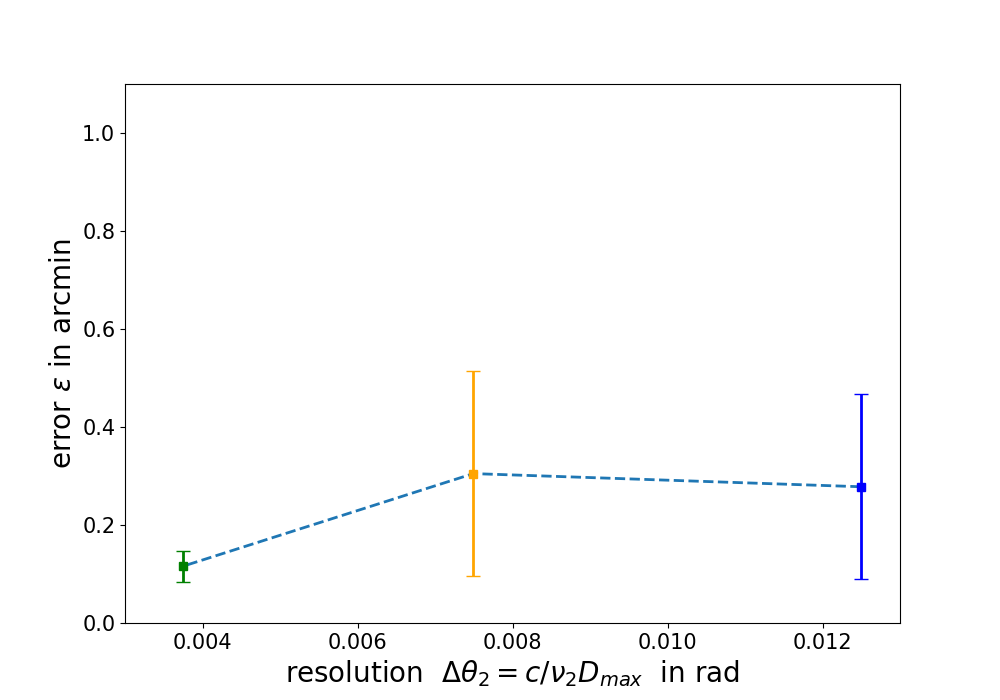

In [11]:
plt.figure(figsize=sizefig)

plt.plot(ress, config_avgs0, linewidth=2, linestyle='--')
plt.errorbar(ress[0], config_avgs0[0], yerr=config_stds0[0], capsize=5, marker='s', linewidth=2, color='b')
plt.errorbar(ress[1], config_avgs0[1], yerr=config_stds0[1], capsize=5, marker='s', linewidth=2, color='orange')
plt.errorbar(ress[2], config_avgs0[2], yerr=config_stds0[2], capsize=5, marker='s', linewidth=2, color='g')

plt.axis([0.003,0.013,-0.,1.1])
plt.xlabel(r'resolution  $\Delta\theta_2 = c/\nu_2 D_{max}}$  in rad', fontsize=fs1)
plt.ylabel(r'error $\epsilon$ in arcmin', fontsize=fs1)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)


if save_fig:
    plt.savefig(figures_path / 'precision_vs_freq_nonoise_config01.pdf', format="pdf", bbox_inches="tight")

In [12]:
na = np.where(alphas==0.03)[0][0]
config_avgs_n = np.nanmean(simu_res[0,:,:,na,:],axis=(0,-1)) #*u.arcmin
config_stds_n = np.nanstd(simu_res[0,:,:,na,:],axis=(0,-1)) #*u.arcmin

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
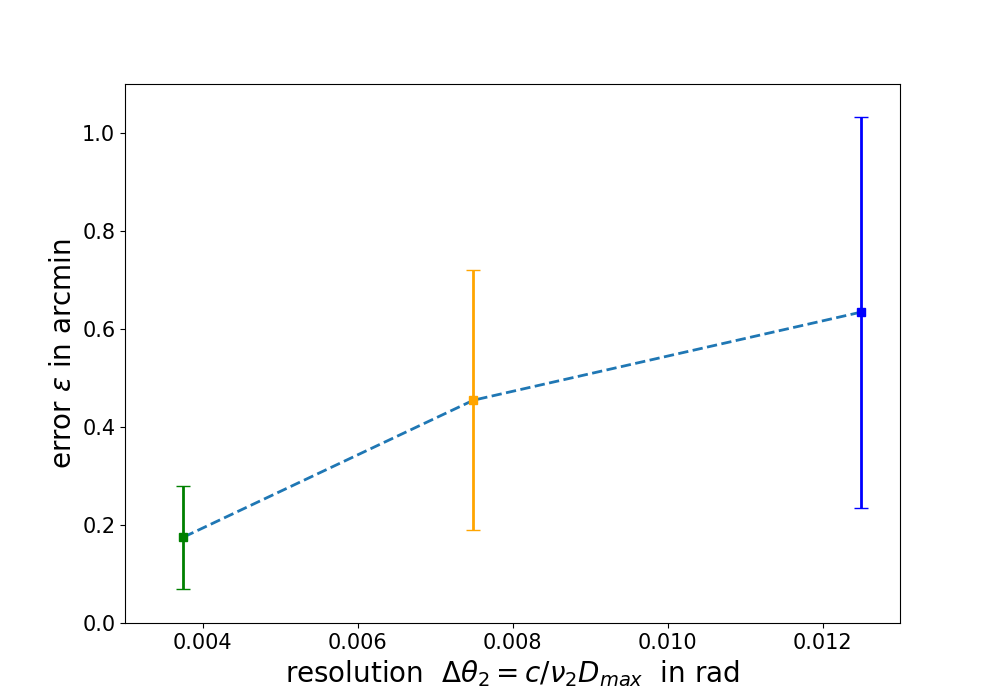

In [13]:
plt.figure(figsize=sizefig)

plt.plot(ress, config_avgs_n, linewidth=2, linestyle='--')
plt.errorbar(ress[0], config_avgs_n[0], yerr=config_stds_n[0], capsize=5, marker='s', linewidth=2, color='b')
plt.errorbar(ress[1], config_avgs_n[1], yerr=config_stds_n[1], capsize=5, marker='s', linewidth=2, color='orange')
plt.errorbar(ress[2], config_avgs_n[2], yerr=config_stds_n[2], capsize=5, marker='s', linewidth=2, color='g')

plt.axis([0.003,0.013,-0.,1.1])
plt.xlabel(r'resolution  $\Delta\theta_2 = c/\nu_2 D_{max}}$  in rad', fontsize=fs1)
plt.ylabel(r'error $\epsilon$ in arcmin', fontsize=fs1)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)

if save_fig:
    plt.savefig(figures_path / 'precision_vs_freq_noise003_config01.pdf', format="pdf", bbox_inches="tight")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
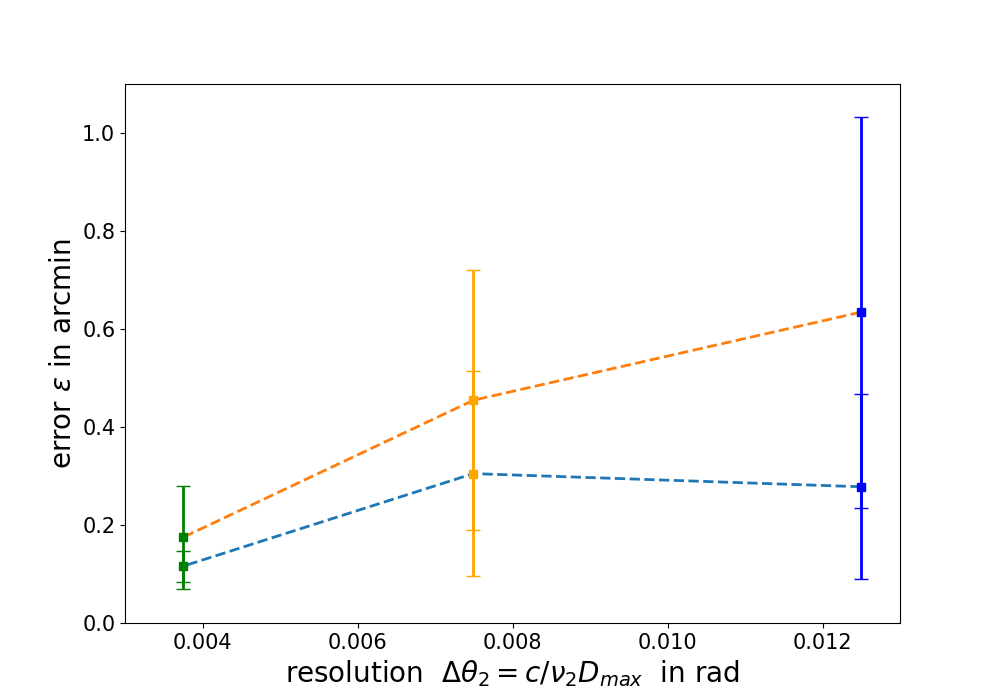

In [14]:
plt.figure(figsize=sizefig)

plt.plot(ress, config_avgs0, linewidth=2, linestyle='--')
plt.errorbar(ress[0], config_avgs0[0], yerr=config_stds0[0], capsize=5, marker='s', linewidth=2, color='b')
plt.errorbar(ress[1], config_avgs0[1], yerr=config_stds0[1], capsize=5, marker='s', linewidth=2, color='orange')
plt.errorbar(ress[2], config_avgs0[2], yerr=config_stds0[2], capsize=5, marker='s', linewidth=2, color='g')

plt.plot(ress, config_avgs_n, linewidth=2, linestyle='--')
plt.errorbar(ress[0], config_avgs_n[0], yerr=config_stds_n[0], capsize=5, marker='s', linewidth=2, color='b')
plt.errorbar(ress[1], config_avgs_n[1], yerr=config_stds_n[1], capsize=5, marker='s', linewidth=2, color='orange')
plt.errorbar(ress[2], config_avgs_n[2], yerr=config_stds_n[2], capsize=5, marker='s', linewidth=2, color='g')


plt.axis([0.003,0.013,-0.,1.1])
plt.xlabel(r'resolution  $\Delta\theta_2 = c/\nu_2 D_{max}}$  in rad', fontsize=fs1)
plt.ylabel(r'error $\epsilon$ in arcmin', fontsize=fs1)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
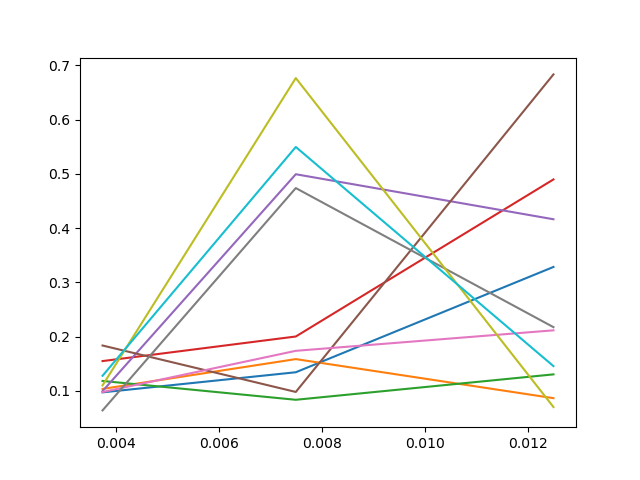

In [15]:
# all config variations
plt.figure()
plt.plot(ress, simu_res[0,:,:,0,0].T)

# Noise influence

Computed on Config #01

evolution of the accuracy as a function of $\alpha$ the noise level for the 3 frequencies

In [16]:
err_avgs = np.nanmean(simu_res[0,0,:,1:,:],axis=-1) #*u.arcmin
err_avgs_nonoise = (simu_res[0,0,:,0,0]) #*u.arcmin

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
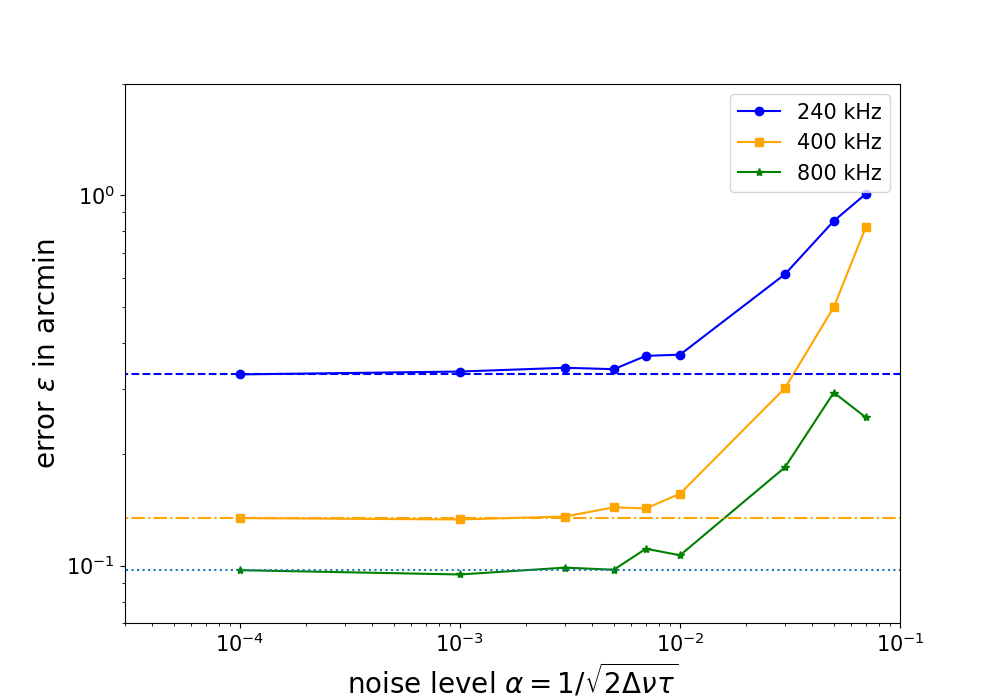

In [17]:
plt.figure(figsize=sizefig)
plt.loglog(alphas[1:], err_avgs[0], color='b', marker='o', label='240 kHz')
plt.plot(alphas[1:],err_avgs[1], color='orange', marker='s', label='400 kHz')
plt.plot(alphas[1:],err_avgs[2], color='g',marker='*', label='800 kHz')

plt.plot([np.min(alphas),np.max(alphas)*2],np.array([err_avgs_nonoise[0],err_avgs_nonoise[0]]),'--',color='b')#, label=r'$\alpha=0$ @ 30-240 kHz')
plt.plot([np.min(alphas),np.max(alphas)*2],np.array([err_avgs_nonoise[1],err_avgs_nonoise[1]]),'-.',color='orange')#, label=r'$\alpha=0$ @ 50-400 kHz')
plt.plot([np.min(alphas),np.max(alphas)*2],np.array([err_avgs_nonoise[2],err_avgs_nonoise[2]]),linestyle='dotted')#,color='g', label=r'$\alpha=0$ @ 100-800 kHz')


plt.axis([3e-5,1e-1,0.07,2])
plt.xlabel(r'noise level $\alpha = 1/\sqrt{2\Delta\nu\tau} $', fontsize=fs1)
plt.ylabel(r'error $\epsilon$ in arcmin',fontsize=fs1)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.legend(fontsize=fs2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
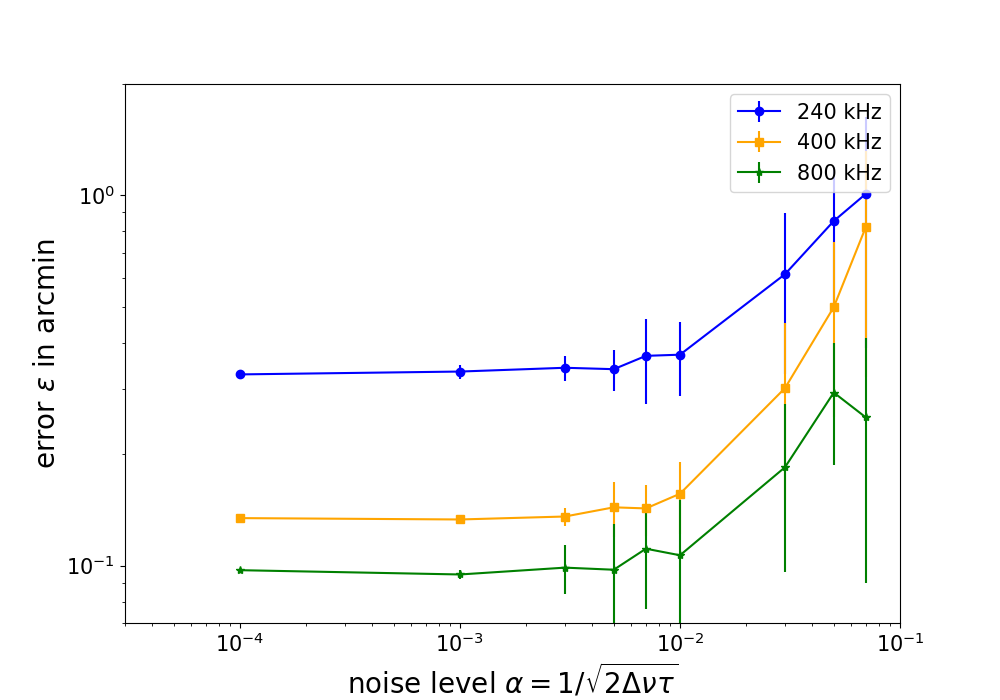

In [18]:
stdsss = np.nanstd(simu_res[0,0,:,1:,:],axis=-1)

plt.figure(figsize=sizefig)
plt.loglog()
plt.errorbar(alphas[1:], err_avgs[0], yerr=stdsss[0], color='b', marker='o', label='240 kHz')
plt.errorbar(alphas[1:],err_avgs[1], yerr=stdsss[1], color='orange', marker='s', label='400 kHz')
plt.errorbar(alphas[1:],err_avgs[2], yerr=stdsss[2], color='g',marker='*', label='800 kHz')

#plt.errorbar([np.min(alphas),np.max(alphas)*2],np.array([err_avgs_nonoise[0],err_avgs_nonoise[0]]),yerr=stdsss[0],color='b')#, label=r'$\alpha=0$ @ 30-240 kHz')
#plt.plot([np.min(alphas),np.max(alphas)*2],np.array([err_avgs_nonoise[1],err_avgs_nonoise[1]]),'-.',color='orange')#, label=r'$\alpha=0$ @ 50-400 kHz')
#plt.plot([np.min(alphas),np.max(alphas)*2],np.array([err_avgs_nonoise[2],err_avgs_nonoise[2]]),linestyle='dotted')#,color='g', label=r'$\alpha=0$ @ 100-800 kHz')


plt.axis([3e-5,1e-1,0.07,2])
plt.xlabel(r'noise level $\alpha = 1/\sqrt{2\Delta\nu\tau} $', fontsize=fs1)
plt.ylabel(r'error $\epsilon$ in arcmin',fontsize=fs1)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.legend(fontsize=fs2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
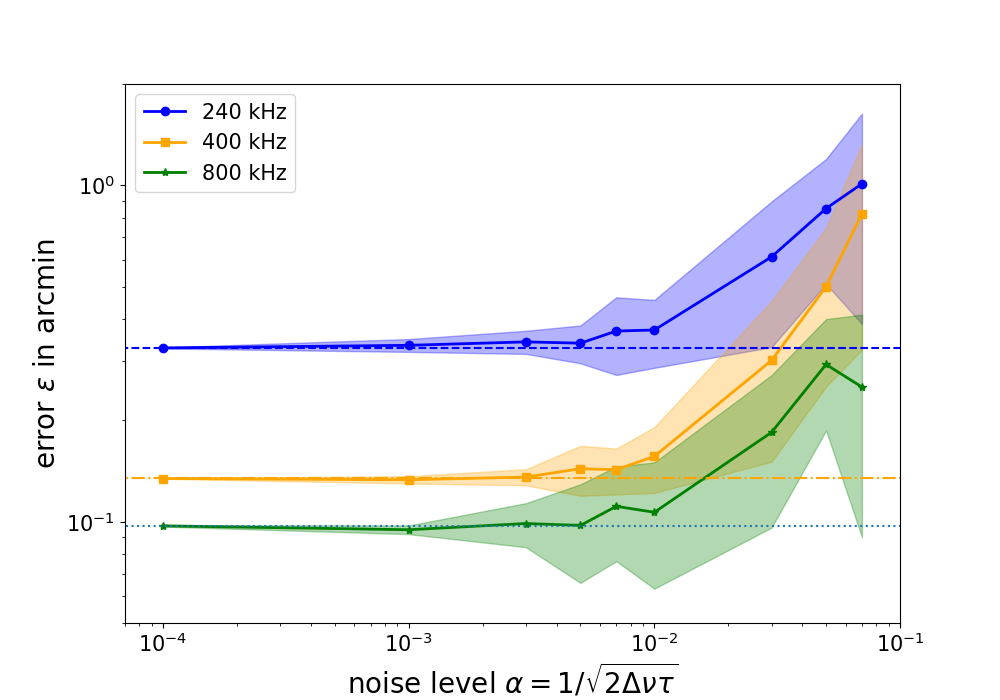

In [19]:
stdsss = np.nanstd(simu_res[0,0,:,1:,:],axis=-1)

plt.figure(figsize=sizefig)
plt.loglog()
plt.plot(alphas[1:], err_avgs[0], color='b', marker='o', label='240 kHz',linewidth=2)
plt.plot(alphas[1:],err_avgs[1], color='orange', marker='s', label='400 kHz',linewidth=2)
plt.plot(alphas[1:],err_avgs[2], color='g',marker='*', label='800 kHz',linewidth=2)

plt.fill_between(alphas[1:], err_avgs[0]-stdsss[0], err_avgs[0]+stdsss[0],alpha=0.3,color='b')
plt.fill_between(alphas[1:], err_avgs[1]-stdsss[1], err_avgs[1]+stdsss[1],alpha=0.3,color='orange')
plt.fill_between(alphas[1:], err_avgs[2]-stdsss[2], err_avgs[2]+stdsss[2],alpha=0.3,color='g')

plt.plot([np.min(alphas),np.max(alphas)*2],np.array([err_avgs_nonoise[0],err_avgs_nonoise[0]]),'--',color='b')#, label=r'$\alpha=0$ @ 30-240 kHz')
plt.plot([np.min(alphas),np.max(alphas)*2],np.array([err_avgs_nonoise[1],err_avgs_nonoise[1]]),'-.',color='orange')#, label=r'$\alpha=0$ @ 50-400 kHz')
plt.plot([np.min(alphas),np.max(alphas)*2],np.array([err_avgs_nonoise[2],err_avgs_nonoise[2]]),linestyle='dotted')#,color='g', label=r'$\alpha=0$ @ 100-800 kHz')


plt.axis([7e-5,1e-1,0.05,2])
plt.xlabel(r'noise level $\alpha = 1/\sqrt{2\Delta\nu\tau} $', fontsize=fs1)
plt.ylabel(r'error $\epsilon$ in arcmin',fontsize=fs1)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.legend(fontsize=fs2)

if save_fig:
    plt.savefig(figures_path / 'precision_vs_noiselvl_config01.pdf', format="pdf", bbox_inches="tight")

# Number of sources detected

In [20]:
ns_max = np.nanmean(simu_res[2,0,:,1:,:],axis=-1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
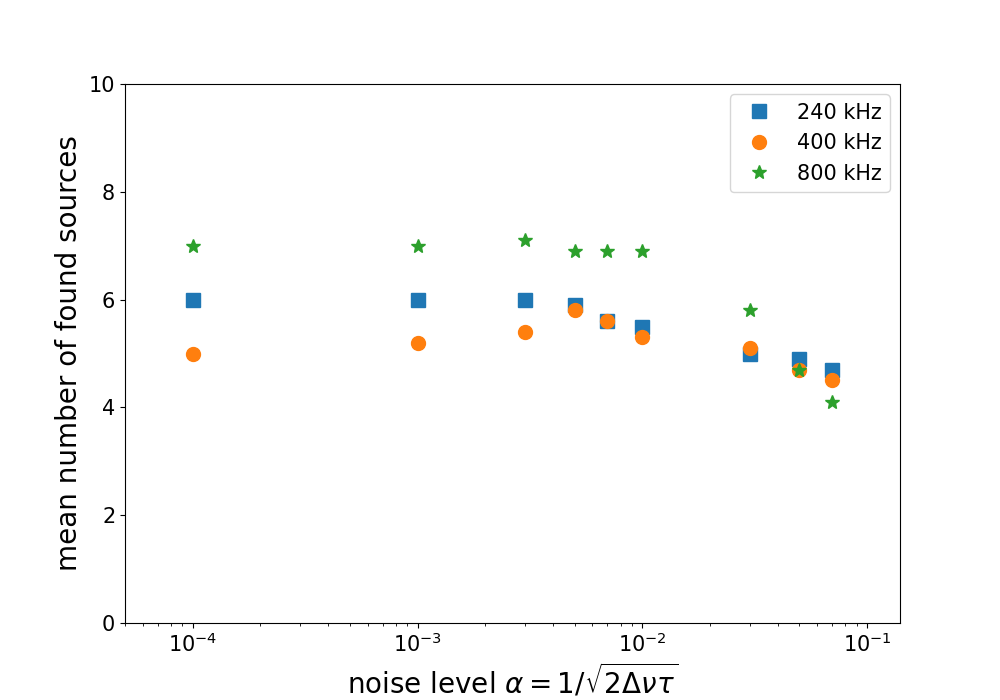

In [21]:
plt.figure(figsize=sizefig)

plt.semilogx(alphas[1:], ns_max[0,:] ,linestyle=' ', marker='s', markersize=10, label='240 kHz')#/15*100)
plt.semilogx(alphas[1:], ns_max[1,:] ,linestyle=' ', marker='o', markersize=10, label='400 kHz')#/15*100)
plt.semilogx(alphas[1:], ns_max[2,:] ,linestyle=' ', marker='*', markersize=10, label='800 kHz')#/15*100)
plt.axis([np.min(alphas[1:])/2,np.max(alphas)*2,0,10])

plt.xlabel(r'noise level $\alpha = 1/\sqrt{2\Delta\nu\tau} $', fontsize=fs1)
plt.ylabel('mean number of found sources', fontsize=fs1)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.legend(fontsize=fs2)

if save_fig:
    plt.savefig(figures_path / 'ns_vs_noiselvl_config01.pdf', format="pdf", bbox_inches="tight")

# Run Time

In [22]:
comptimes = simu_res[3,0,:,1,:]
comp_time = np.mean(comptimes,axis=-1)
comp_time_dev = np.std(comptimes,axis=-1)

In [23]:
comp_time2 = np.mean(simu_res[3,:,:,0,0],axis=0)
comp_time_dev2 = np.std(simu_res[3,:,:,0,0],axis=0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
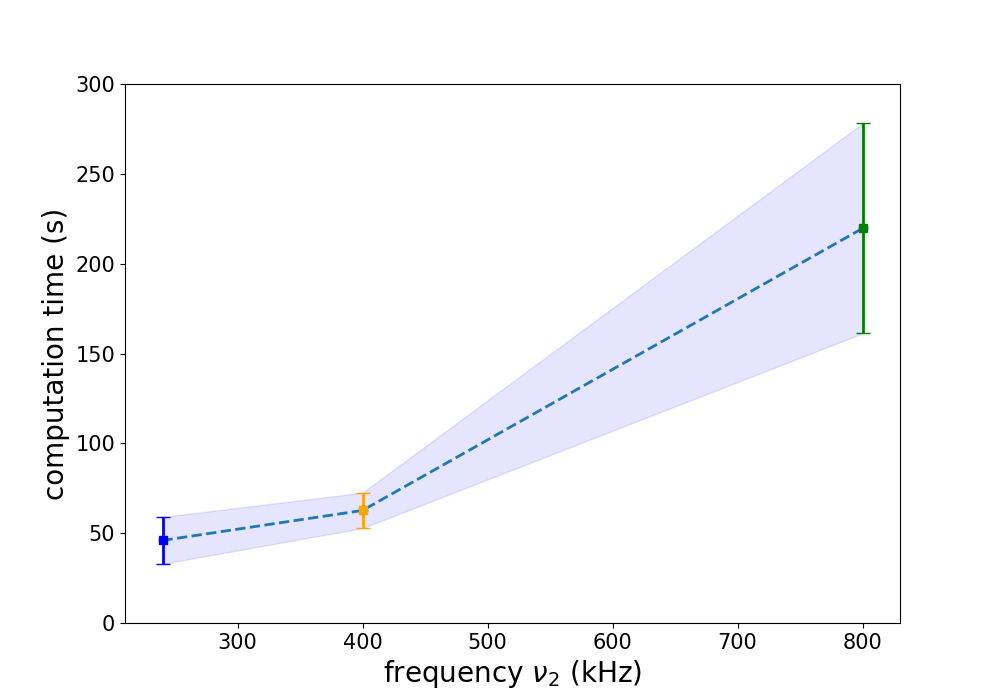

In [24]:
plt.figure(figsize=sizefig)
plt.plot(freqs,comp_time2, linewidth=2, linestyle='--', marker='o')
plt.fill_between(freqs, comp_time2-comp_time_dev2, comp_time2+comp_time_dev2,alpha=0.1,color='b')


plt.errorbar(freqs[0].to_value(u.kHz), comp_time2[0], yerr=comp_time_dev2[0], capsize=5, marker='s', linewidth=2, color='b')
plt.errorbar(freqs[1].to_value(u.kHz), comp_time2[1], yerr=comp_time_dev2[1], capsize=5, marker='s', linewidth=2, color='orange')
plt.errorbar(freqs[2].to_value(u.kHz), comp_time2[2], yerr=comp_time_dev2[2], capsize=5, marker='s', linewidth=2, color='g')


plt.axis([210,830,0,300])
plt.xlabel(r'frequency $\nu_2$ (kHz)', fontsize=fs1)
plt.ylabel('computation time (s)', fontsize=fs1)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)

if save_fig:
    plt.savefig(figures_path / 'computation_time_vs_freq_avg_config.pdf', format="pdf", bbox_inches="tight")

In [25]:
comp_time3 = np.nanmean(simu_res[3,:,:,:,:],axis=(0,2,3))
comp_time_dev31 = np.nanstd(simu_res[3,0,:,:,:],axis=(-1,-2))
comp_time_dev32 = np.nanstd(simu_res[3,:,:,0,0],axis=0)
comp_time_dev33 = np.nanstd(simu_res[3,:,:,:,:],axis=(0,2,3))

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
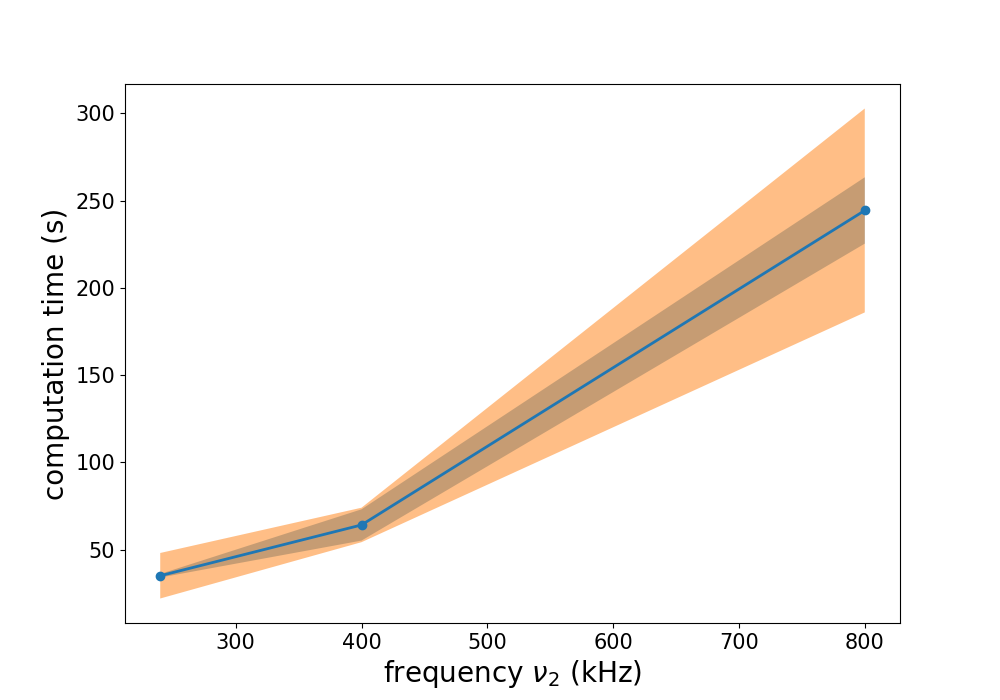

In [26]:
plt.figure(figsize=sizefig)
#plt.loglog()
plt.plot(freqs,comp_time3, linewidth=2, linestyle='-', marker='o')
plt.fill_between(freqs, comp_time3-comp_time_dev31, comp_time3+comp_time_dev31,alpha=0.5)#,color='orange')
plt.fill_between(freqs, comp_time3-comp_time_dev32, comp_time3+comp_time_dev32,alpha=0.5)#,color='orange')
#plt.fill_between(freqs, comp_time3-comp_time_dev33, comp_time3+comp_time_dev33,alpha=0.5)#,color='orange')

plt.xlabel(r'frequency $\nu_2$ (kHz)', fontsize=fs1)
plt.ylabel('computation time (s)', fontsize=fs1)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
#plt.legend(fontsize=fs2)